This script was based on: https://crackedbassoon.com/writing/ddm-figure

100%|██████████| 379/379 [00:00<00:00, 1011.73it/s]
<ipython-input-4-fe1cfa06f031>:128: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(0)


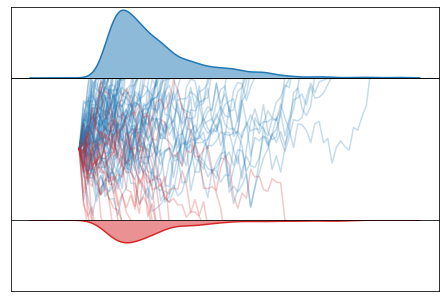

In [4]:
import hddm
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from tqdm import tqdm


def setupfig():
    """Tweak for the target journal.

    """
    fig = plt.figure()
    gs = GridSpec(3, 1, height_ratios=[1, 2, 1], hspace=0)
    return fig, gs


def delabel(ax):
    """Strip labels.

    """
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])


def kde(ax, x, mx, c):
    """Plot a KDE for reaction times.

    """
    x = x[x <= mx]
    bandwidth = 0.8 * x.std() * x.size ** (-1 / 5.0)
    support = np.linspace(0, mx, 500)
    kernels = []

    for x_i in tqdm(x):

        kernel = norm(x_i, bandwidth).pdf(support)
        kernels.append(kernel)
        density = np.sum(kernels, axis=0)

    my = np.max(density)
    ax.plot(support, density, c=c)
    ax.fill_between(support, 0, density, alpha=0.5, facecolor=c)
    ax.set_ylim(0, my * 1.05)
    delabel(ax)

    return my


def traces(ax, n, mx, **params):
    """Draw example diffusions.

    """
    x = np.linspace(0, mx, 101)
    delta = x[1]
    nd_samples = np.round(params["t"] / delta).astype(int)
    d_samples = len(x) - nd_samples
    y0 = np.zeros(nd_samples) * np.nan
    y0[-1] = 0

    for i in range(n):

        y1 = np.cumsum(norm.rvs(params["v"] * delta, np.sqrt(delta), size=d_samples))
        y = params["a"] * params["z"] + np.concatenate([y0, y1])

        try:

            idx1 = np.where(y > params["a"])[0][0] + 1

        except:

            idx1 = np.inf

        try:

            idx2 = np.where(y < 0)[0][0] + 1

        except:

            idx2 = np.inf

        if idx1 < idx2:

            y[idx1:] = np.nan
            ax.plot(x, y, c="C0", zorder=-12, alpha=0.25)

        if idx2 < idx1:

            y[idx2:] = np.nan
            ax.plot(x, y, c="C3", zorder=-11, alpha=0.25)

        ax.set_ylim(0, params["a"])
        ax.set_xlim(0, mx)
        delabel(ax)


def ddmfig(ntraces = 100, **params):
    """Draw a DDM plot with the given parameter values.

    """
    mx = 3.5       # max x-value; adjust this if simulated RTs are slower/faster
    size = 1500    # increase this number for better KDEs
    # ntraces = 100  # increase this for more example diffusions

    # set up fig
    fig, gs = setupfig()

    # traces
    ax = plt.subplot(gs[1])
    traces(ax, ntraces, mx, **params)

    # data for kdes
    df, _ = hddm.generate.gen_rand_data(params, subjs=1, size=size)

    # top KDE
    ax = plt.subplot(gs[0])
    my = kde(ax, df[df.response == 1].rt.values, mx, "C0")

    # bottom KDE
    ax = plt.subplot(gs[2])
    kde(ax, df[df.response == 0].rt.values, mx, "C3")
    ax.set_ylim(0, my * 1.05)
    ax.invert_yaxis()

    # remove whitespace around fig
    plt.tight_layout(0)


def main():

    np.random.seed(25)
    ddmfig(v=0.7, a=1.5, t=0.6, z=0.5, ntraces=100)
    plt.savefig("ddm-fig.pdf", bbox_inches=0, transparent=True)


if __name__ == "__main__":

    main()

100%|██████████| 426/426 [00:00<00:00, 1019.51it/s]
<ipython-input-1-67861e717ce0>:128: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(0)


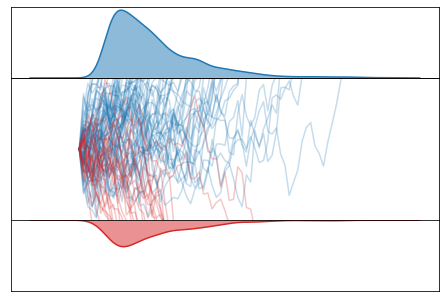

In [2]:
ddmfig(v=0.7, a=1.5, t=0.6, z=0.5, ntraces = 100)

100%|██████████| 339/339 [00:00<00:00, 973.16it/s] 
<ipython-input-4-fe1cfa06f031>:128: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(0)


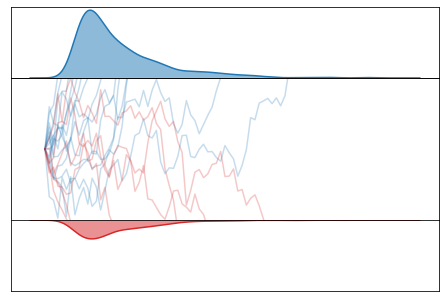

In [9]:
ddmfig(v=0.8, a=1.5, t=0.3, z=0.5, ntraces = 20)
plt.savefig("ddm-fig.pdf", bbox_inches=0, transparent=True)